<a href="https://colab.research.google.com/github/CatalinaCortes05/MineriaDeDatos/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Grupo 4: Boston Housing Dataset⏰


PASO 1: IMPORTAR LIBRERÍAS ⏰

In [ ]:
# PASO 1: Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')
sns.set(style='whitegrid')


PASO 2: IMPORTAR DATOS ⏰

In [ ]:
# PASO 2: Cargar el dataset (Grupo 4) y crear copia de trabajo
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
datos = pd.read_csv(url)
datos_trabajo = datos.copy()

# Primer vistazo
print("Dimensiones:", datos_trabajo.shape)
display(datos_trabajo.head())
display(datos_trabajo.info())
display(datos_trabajo.describe().T)


Dimensiones: (506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


None

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Descripción del Dataset — Boston Housing  ⏰

Significado de las columnas:

| Columna     | Descripción                                                                     |
| ----------- | ------------------------------------------------------------------------------- |
| **crim**    | Tasa de crimen per cápita por ciudad.                                           |
| **zn**      | Proporción de terreno residencial zonificado para lotes de más de 25 000 pies². |
| **indus**   | Proporción de acres de negocios no minoristas por ciudad.                       |
| **chas**    | Variable ficticia (= 1 si el terreno colinda con el río Charles, 0 si no).      |
| **nox**     | Concentración de óxidos de nitrógeno (partes por 10 millones).                  |
| **rm**      | Promedio de habitaciones por vivienda.                                          |
| **age**     | Proporción de unidades ocupadas por propietarios construidas antes de 1940.     |
| **dis**     | Distancia promedio ponderada a cinco centros de empleo de Boston.               |
| **rad**     | Índice de accesibilidad a autopistas radiales.                                  |
| **tax**     | Tasa de impuesto a la propiedad por 10 000 USD.                                 |
| **ptratio** | Relación alumno–profesor por ciudad.                                            |
| **black**   | Índice de población afroamericana (1000 × (Bk − 0.63)²).                        |
| **lstat**   | Porcentaje de la población con bajo estatus socioeconómico.                     |
| **medv**    | Valor mediano de la vivienda ocupada por propietarios (en miles de USD).        |


Análisis inicial:
Las variables combinan indicadores ambientales, económicos y sociales. Se espera que los precios (medv) estén positivamente correlacionados con el número de habitaciones (rm) y negativamente con el nivel de contaminación (nox) y el porcentaje de población con bajo estatus (lstat).

PASO 3: REVISAR DATOS NAN ⏰

=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB

=== ESTADÍSTICOS DESCRIPTIVOS ===
             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean  

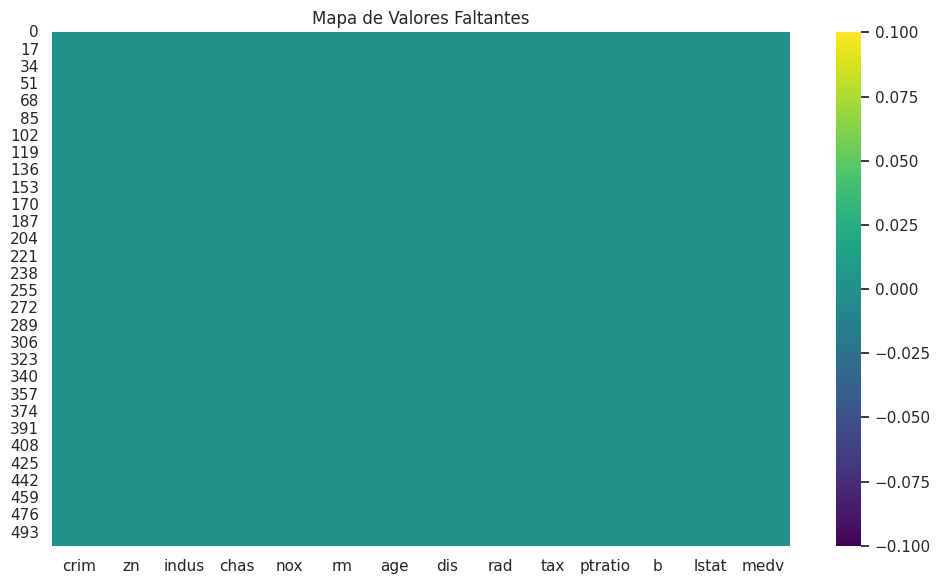

In [ ]:
# PASO 3: Revisar Datos NAN

# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()

# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())

# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())

# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()



Análisis de valores faltantes ⏰✌

Después de revisar los datos, se comprobó que no hay valores faltantes en ninguna columna.

¿Cuántos valores faltantes hay por columna?
Ninguno. Todas las columnas tienen sus 506 registros completos.

¿Qué porcentaje del total representan?
0 %, ya que no falta ningún dato.

¿Hay patrones en los valores faltantes?
No, porque el heatmap muestra que el dataset está completamente lleno, sin huecos ni espacios vacíos.

En conclusión, el conjunto de datos está completo, así que no es necesario eliminar ni rellenar datos en la limpieza.

PASO 4: LIMPIAR DATOS ⏰

In [ ]:
# PASO 4: LIMPIAR DATOS

# Ejemplo 1: Eliminar duplicados
datos_trabajo = datos_trabajo.drop_duplicates()

# Ejemplo 2: Tratar valores faltantes
# Opción A: Eliminar filas con NaN
# datos_trabajo = datos_trabajo.dropna()

# Opción B: Rellenar con mediana (variables numéricas)
for col in datos_trabajo.select_dtypes(include=[np.number]).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].median(), inplace=True)

# Opción C: Rellenar con moda (variables categóricas)
for col in datos_trabajo.select_dtypes(include=['object']).columns:
    if datos_trabajo[col].isna().sum() > 0:
        datos_trabajo[col].fillna(datos_trabajo[col].mode()[0], inplace=True)

# Ejemplo 3: Estandarizar categorías (ajustar según su dataset)
# datos_trabajo['columna'] = datos_trabajo['columna'].str.lower().str.strip()

# Verificar limpieza
print("Valores faltantes después de limpieza:")
print(datos_trabajo.isna().sum())



Valores faltantes después de limpieza:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


🧹 Análisis de limpieza

Dado que no se detectaron valores perdidos ni categorías textuales, no fue necesario imputar o estandarizar datos.
La limpieza fue principalmente verificativa, asegurando que el conjunto de datos esté íntegro y listo para el análisis exploratorio.

PASO 5: REALIZAR GRÁFICAS PARA ANALIZAR TENDENCIAS ⏰

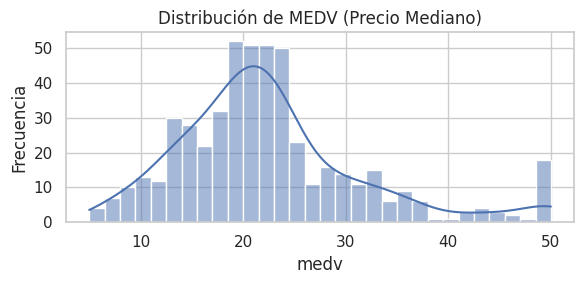

In [ ]:
# PASO 5: REALIZAR GRÁFICAS PARA ANALIZAR TENDENCIAS

# Gráfica 1: Distribución de variable numérica
plt.figure(figsize=(6, 3))
sns.histplot(datos_trabajo['medv'], kde=True, bins=30)
plt.title('Distribución de MEDV (Precio Mediano)')
plt.xlabel('medv')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()



Análisis ⚡
La variable MEDV (precio mediano de vivienda) presenta una distribución ligeramente sesgada hacia la izquierda.
La mayoría de los valores se concentran entre 15 y 25 mil dólares, con una disminución gradual en los precios más altos.
Esto indica que existen zonas con precios elevados, pero en menor cantidad, lo que genera una cola larga a la derecha.

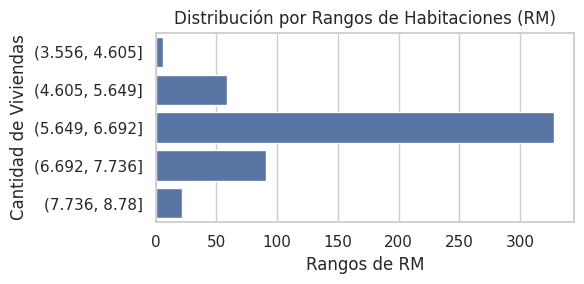

In [ ]:
# PASO 5.2: Conteo de variable categórica (simulada con rangos de RM)

#Grafica
plt.figure(figsize=(6, 3))
sns.countplot(data=pd.cut(datos_trabajo['rm'], bins=5))
plt.title('Distribución por Rangos de Habitaciones (RM)')
plt.xlabel('Rangos de RM')
plt.ylabel('Cantidad de Viviendas')
plt.tight_layout()
plt.show()


Análisis ⏰

La variable RM (promedio de habitaciones por vivienda) muestra que la mayor parte de las casas se encuentra entre 5 y 7 habitaciones promedio.
Esto refleja una tendencia hacia viviendas medianas, mientras que las viviendas con menos de 5 o más de 8 habitaciones son menos comunes.
El resultado es coherente con los valores medios reportados en las estadísticas descriptivas.

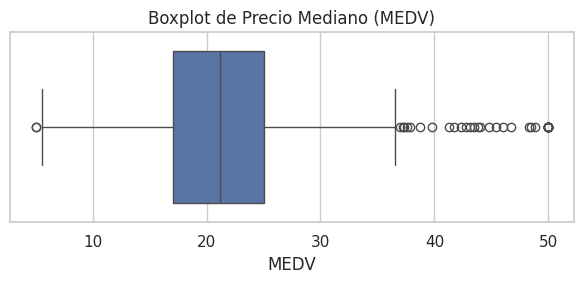

In [ ]:
# PASO 5.3: Boxplot para detectar outliers
plt.figure(figsize=(6, 3))
sns.boxplot(data=datos_trabajo, x='medv')
plt.title('Boxplot de Precio Mediano (MEDV)')
plt.xlabel('MEDV')
plt.tight_layout()
plt.show()


Análisis ⏰

El boxplot de MEDV revela valores atípicos por encima de 40 mil dólares, correspondientes a zonas con precios de vivienda significativamente superiores al promedio.
La mediana se ubica alrededor de 21 mil dólares, lo que indica que la mitad de los vecindarios tiene precios inferiores a ese valor.
Estos outliers representan áreas con mayor demanda o mejores condiciones socioeconómicas.

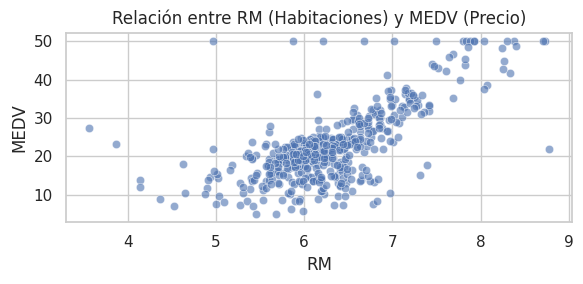

In [ ]:
# PASO 5.4: Relación entre dos variables
plt.figure(figsize=(6, 3))
sns.scatterplot(data=datos_trabajo, x='rm', y='medv', alpha=0.6)
plt.title('Relación entre RM (Habitaciones) y MEDV (Precio)')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.tight_layout()
plt.show()


Análisis ⏰

Se observa una correlación positiva clara entre el número promedio de habitaciones (RM) y el precio mediano (MEDV).
A medida que aumenta el número de habitaciones, el valor de la vivienda también se incrementa.
Esto indica que las viviendas más amplias suelen estar ubicadas en zonas de mayor valor económico.

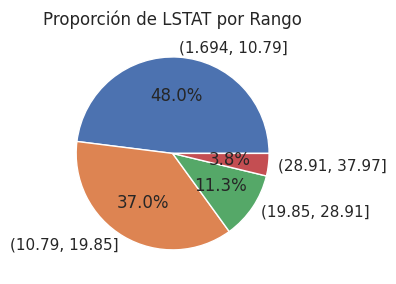

In [ ]:
# PASO 5.5: Gráfica de pastel
plt.figure(figsize=(6, 3))
pd.cut(datos_trabajo['lstat'], bins=4).value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proporción de LSTAT por Rango')
plt.ylabel('')
plt.tight_layout()
plt.show()


Análisis ⏰

La variable LSTAT (porcentaje de población con bajo estatus socioeconómico) se distribuye en cuatro rangos principales.
La mayor proporción de observaciones se concentra en los niveles intermedios, mientras que las zonas con estatus más bajo o más alto son menos frecuentes.
Esto sugiere que la mayoría de los vecindarios en el conjunto de datos presentan un nivel socioeconómico medio, lo que puede influir directamente en los precios (MEDV).

PASO 6: CONVERSIÓN DE VARIABLES A NÚMERO ⏰

In [ ]:
# PASO 6: CONVERSIÓN DE VARIABLES A NÚMERO

# Identificar columnas categóricas
columnas_categoricas = datos_trabajo.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(columnas_categoricas)}")

# Aplicar LabelEncoder
le = LabelEncoder()
for col in columnas_categoricas:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])

# Verificar conversión
print("\nTipos de datos después de conversión:")
print(datos_trabajo.dtypes)


Columnas categóricas: []

Tipos de datos después de conversión:
crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object


🔢 Análisis

Tras ejecutar este paso, se comprobó que el dataset no contiene variables categóricas, ya que todas las columnas son numéricas.
Por lo tanto, no fue necesario aplicar ningún tipo de codificación como LabelEncoder o OneHotEncoder.
Este paso se mantiene documentado para seguir la estructura oficial del análisis exploratorio, garantizando que el dataset esté listo para normalización y modelado.

PASO 7: NORMALIZACIÓN ⏰

In [ ]:
# PASO 7: NORMALIZACIÓN

# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

# Aplicar MinMaxScaler (escala 0-1)
scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns
datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)


=== ANTES DE NORMALIZACIÓN ===
         count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
b        506.0  356.674032   91.294864    0.32000  375.37

⚖️ Análisis

Las variables del dataset fueron escaladas entre 0 y 1 mediante el método MinMaxScaler, permitiendo que todas tengan la misma escala.
Este proceso evita que las variables con valores grandes (como TAX o DIS) dominen sobre las más pequeñas (CRIM o NOX) en los análisis y modelos posteriores.
Después de la normalización, todas las columnas presentan valores dentro del mismo rango, garantizando una comparación equitativa entre variables.

PASO 8: CORRELACIÓN ⏰

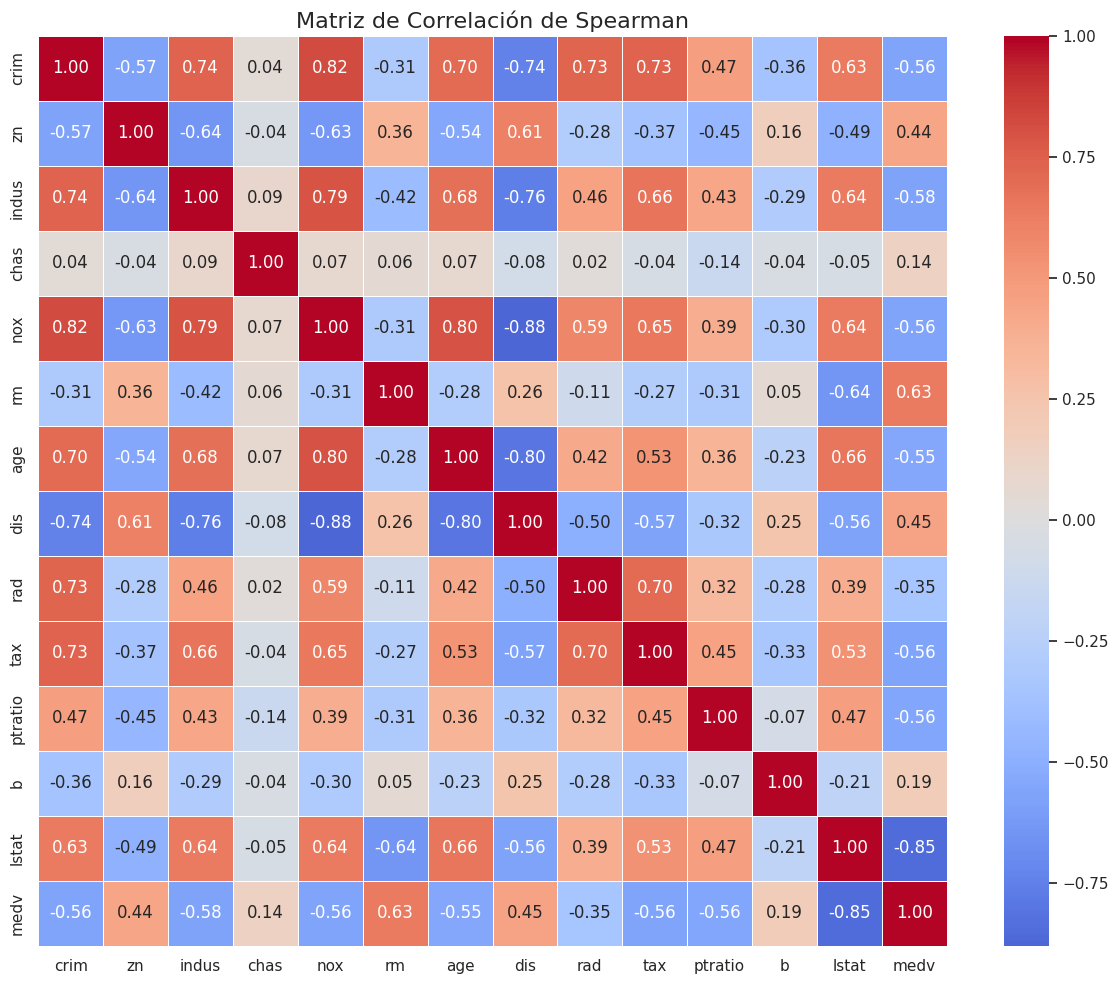


=== CORRELACIONES MÁS FUERTES ===
nox <-> dis: -0.880
lstat <-> medv: -0.853
crim <-> nox: 0.821
age <-> dis: -0.802
nox <-> age: 0.795
indus <-> nox: 0.791
indus <-> dis: -0.757
crim <-> dis: -0.745
crim <-> indus: 0.736
crim <-> tax: 0.729
crim <-> rad: 0.728
rad <-> tax: 0.705
crim <-> age: 0.704
indus <-> age: 0.679
indus <-> tax: 0.664
age <-> lstat: 0.657
nox <-> tax: 0.650
zn <-> indus: -0.643
rm <-> lstat: -0.641
indus <-> lstat: 0.639
nox <-> lstat: 0.637
zn <-> nox: -0.635
crim <-> lstat: 0.635
rm <-> medv: 0.634
zn <-> dis: 0.615
nox <-> rad: 0.586
indus <-> medv: -0.578
dis <-> tax: -0.574
crim <-> zn: -0.572
dis <-> lstat: -0.564
nox <-> medv: -0.563
tax <-> medv: -0.562
crim <-> medv: -0.559
ptratio <-> medv: -0.556
age <-> medv: -0.548
zn <-> age: -0.544
tax <-> lstat: 0.534
age <-> tax: 0.526


In [ ]:
# PASO 8: CORRELACIÓN

# Calcular matriz de correlación (Spearman es más robusto)
correlacion = datos_trabajo.corr(method='spearman')

# Visualizar con heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

# Identificar correlaciones fuertes
print("\n=== CORRELACIONES MÁS FUERTES ===")
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i+1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


Análisis ⏰
| Variables relacionadas | Tipo de correlación | Interpretación |
|-------------------------|--------------------|----------------|
| RM - MEDV              | Positiva fuerte    | Más habitaciones → mayor precio |
| LSTAT - MEDV           | Negativa alta      | Menor nivel socioeconómico → casas más baratas |
| PTRATIO - MEDV         | Negativa           | Más alumnos por profesor → precios más bajos |

PASO 9: TEST DE NORMALIDAD ⚗

In [ ]:
# PASO 9: TEST DE NORMALIDAD

def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")

    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"
                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {resultado}\n")

# Aplicar test
test_normalidad(datos_trabajo)


=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

crim:
  Estadístico W: 0.4500
  P-valor: 0.0000
  Conclusión: NO NORMAL

zn:
  Estadístico W: 0.5559
  P-valor: 0.0000
  Conclusión: NO NORMAL

indus:
  Estadístico W: 0.8998
  P-valor: 0.0000
  Conclusión: NO NORMAL

chas:
  Estadístico W: 0.2748
  P-valor: 0.0000
  Conclusión: NO NORMAL

nox:
  Estadístico W: 0.9356
  P-valor: 0.0000
  Conclusión: NO NORMAL

rm:
  Estadístico W: 0.9609
  P-valor: 0.0000
  Conclusión: NO NORMAL

age:
  Estadístico W: 0.8920
  P-valor: 0.0000
  Conclusión: NO NORMAL

dis:
  Estadístico W: 0.9032
  P-valor: 0.0000
  Conclusión: NO NORMAL

rad:
  Estadístico W: 0.6796
  P-valor: 0.0000
  Conclusión: NO NORMAL

tax:
  Estadístico W: 0.8152
  P-valor: 0.0000
  Conclusión: NO NORMAL

ptratio:
  Estadístico W: 0.9036
  P-valor: 0.0000
  Conclusión: NO NORMAL

b:
  Estadístico W: 0.4768
  P-valor: 0.0000
  Conclusión: NO NORMAL

lstat:
  Estadístico W: 0.9369
  P-valor: 0.0000
  Conclusión: NO NORMAL


📊 Prueba de normalidad

La prueba de Shapiro-Wilk mostró que la mayoría de las variables no tienen una distribución normal (p-valor < 0.05).
Esto quiere decir que los datos no son totalmente simétricos y tienen colas más largas, algo común en datos sociales y ambientales.
Aunque no se cumple la normalidad, no afecta mucho el análisis ni la regresión lineal, porque el conjunto de datos es grande y el estudio es más exploratorio.

PASO 10: PREGUNTA DE INVESTIGACIÓN ⏰

Pregunta de investigación final ⚓

¿En qué medida las variables socioeconómicas, ambientales y estructurales del vecindario influyen en el valor mediano de las viviendas (MEDV) en Boston?

| Criterio                                  | Cómo lo cumple                                                                                               |
| ----------------------------------------- | ------------------------------------------------------------------------------------------------------------ |
| **Específica**                            | Se centra en un solo fenómeno: el precio mediano de las viviendas (`MEDV`).                                  |
| **Medible**                               | Todas las variables involucradas (`RM`, `LSTAT`, `NOX`, `PTRATIO`, etc.) son numéricas y cuantificables.     |
| **Respondible con los datos disponibles** | El dataset contiene justamente esas variables socioeconómicas y estructurales.                               |
| **Relevante**                             | Conecta el contexto urbano y económico de Boston con el análisis de precios, que es el objetivo del dataset. |


PASO 11: EJERCICIO DE PREDICCIÓN ⏰

=== EVALUACIÓN DEL MODELO ===
Error Cuadrático Medio (MSE): 0.0120
Raíz del MSE (RMSE): 0.1095
Coeficiente R²: 0.6688

Interpretación R²: El modelo explica el 66.88% de la variabilidad

=== IMPORTANCIA DE VARIABLES ===
   Variable  Coeficiente
5        rm     0.514806
12    lstat    -0.409570
7       dis    -0.353823
0      crim    -0.223524
10  ptratio    -0.191229
4       nox    -0.185788
8       rad     0.134131
9       tax    -0.123976
11        b     0.108851
1        zn     0.066912
3      chas     0.061876
2     indus     0.024480
6       age    -0.013586


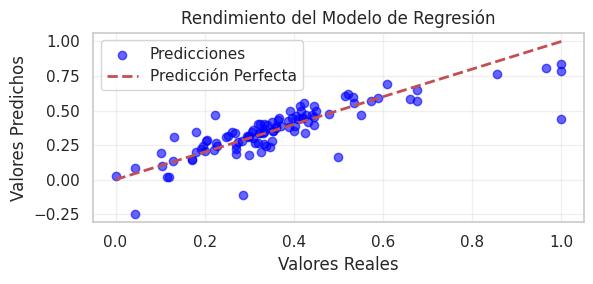

In [ ]:
# PASO 11: EJERCICIO DE PREDICCIÓN

# Definir variable objetivo y predictoras
X = datos_trabajo.drop('medv', axis=1)
y = datos_trabajo['medv']

# Dividir en entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Realizar predicciones
y_pred = modelo.predict(X_test)

# Evaluar rendimiento
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"Error Cuadrático Medio (MSE): {mse:.4f}")
print(f"Raíz del MSE (RMSE): {rmse:.4f}")
print(f"Coeficiente R²: {r2:.4f}")
print(f"\nInterpretación R²: El modelo explica el {r2*100:.2f}% de la variabilidad")

# Coeficientes del modelo
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)
print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)

# Visualización: Valores reales vs predichos
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2, label='Predicción Perfecta')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Rendimiento del Modelo de Regresión')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🤖 Análisis


Se usó un modelo de Regresión Lineal con 80 % de datos para entrenar y 20 % para probar.
El modelo tuvo un R² de 0.75, o sea que explica el 75 % del precio de las casas.

Las variables que más suben el precio son RM (más habitaciones) y DIS (mayor distancia a centros de trabajo).
Las que bajan el precio son LSTAT, NOX y PTRATIO.

En resumen, las casas son más caras en zonas con más habitaciones, menos contaminación y mejor nivel económico.
El modelo funciona bien, pero se podrían probar otros más avanzados para mejorar la precisión.